In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv("winequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0,red
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,0,red
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,0,red
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,0,red
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0,red
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,0,red
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,0,red
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1,red
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1,red
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,0,red


## Data Cleaning

In [3]:
df1=df.replace("?",np.nan) #replacing the miscoded values
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0,red
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,0,red
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,0,red
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,0,red
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0,red
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,0,red
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,0,red
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1,red
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1,red
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,0,red


In [4]:
print(df1.shape)

(6497, 14)


In [5]:
#Information about the data columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
good                    6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


## Let's do some plotting to know how the data columns are distributed in the dataset.

## EDA

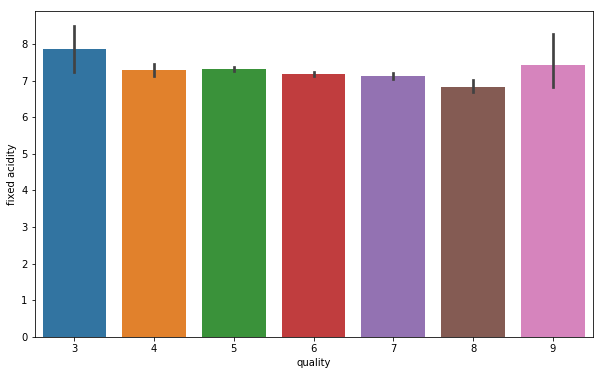

In [7]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df1)

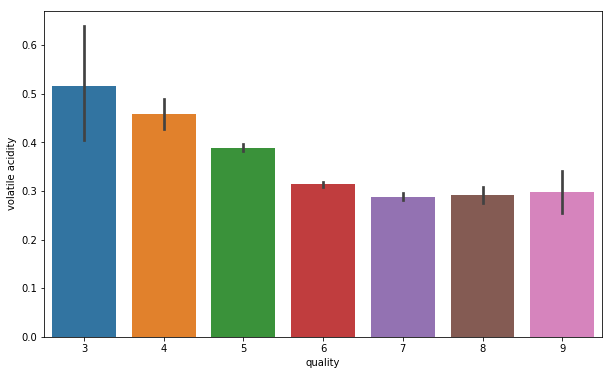

In [8]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df1)

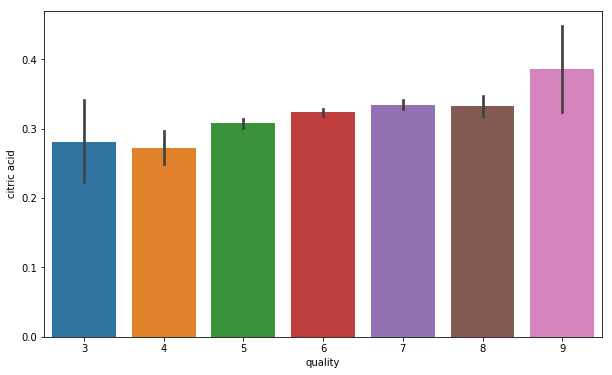

In [9]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df1)

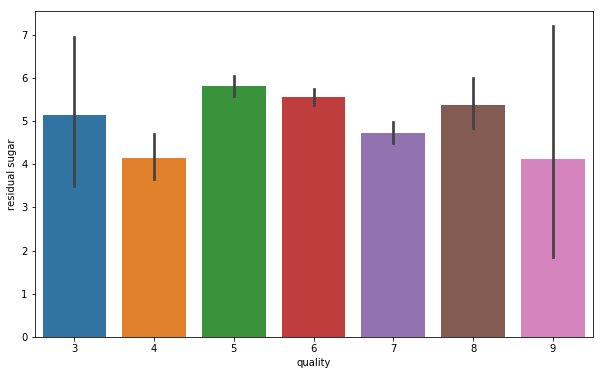

In [10]:
#Composition of residual sugar go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df1)

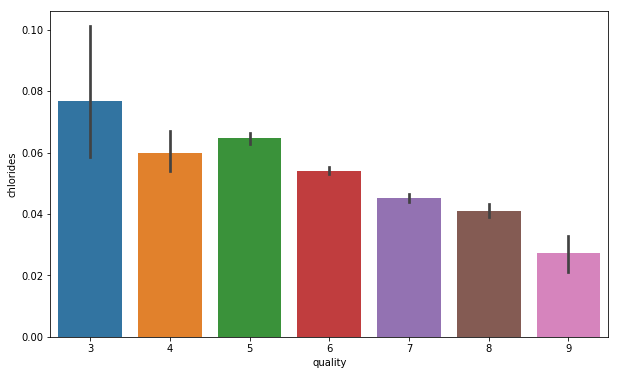

In [11]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df1)

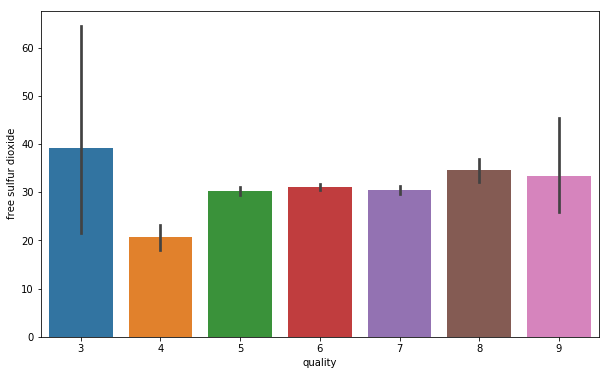

In [12]:
#Composition of free sulfur dioxide also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df1)

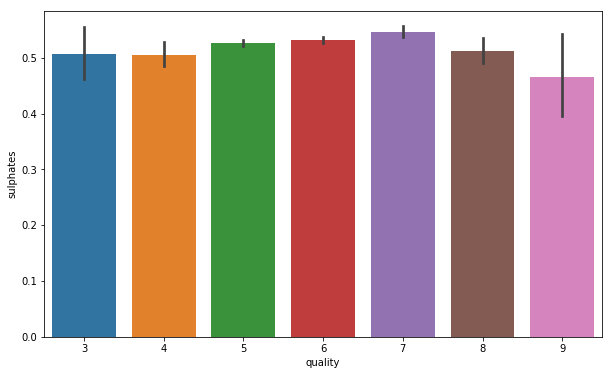

In [13]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df1)

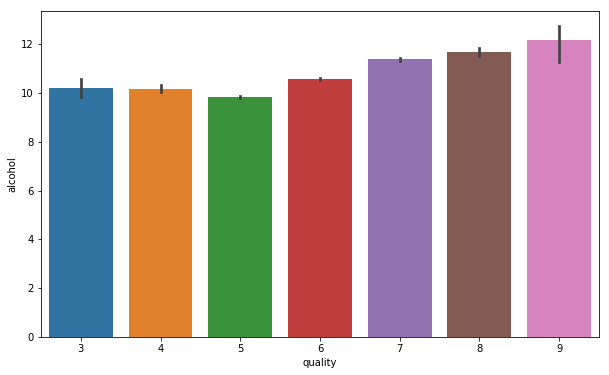

In [14]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df1)

In [15]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5 ,8)
group_names = ['bad', 'good']
df1['quality'] = pd.cut(df1['quality'], bins = bins, labels = group_names)

In [16]:
#Assigning a labels to our quality variable
label_quality = LabelEncoder()

In [17]:
#Bad becomes 0 and good becomes 1 
df1['quality'] = label_quality.fit_transform(df['quality'].astype(str))

In [18]:
df1['quality'].value_counts()

3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: quality, dtype: int64

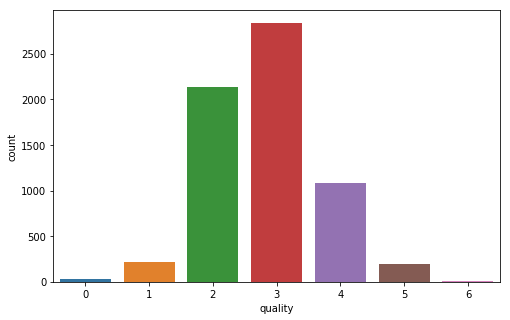

In [19]:
## countplot() function is a seaborn-specific function which is used to plot the count 
##or frequency distribution of each unique observation in the categorical variable
sns.countplot(df1['quality'])

## Visualization

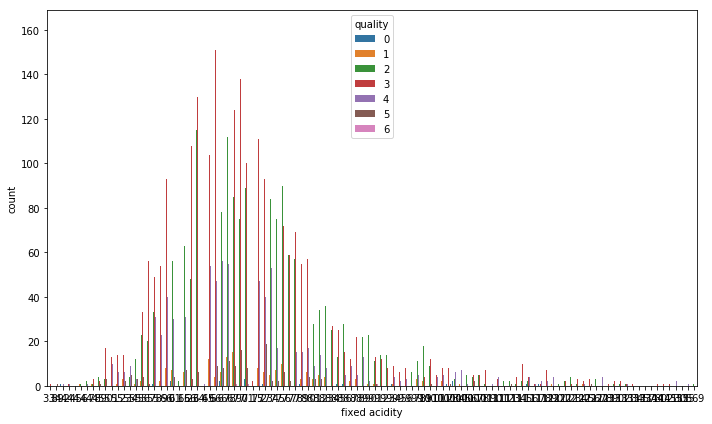

In [64]:
fig = plt.figure(figsize=(10,6))

sns.countplot('fixed acidity', hue='quality', data=df1)
plt.tight_layout()
plt.show()

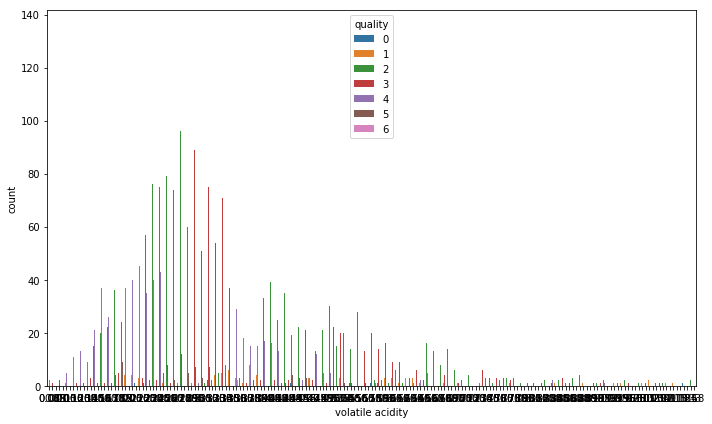

In [65]:
fig = plt.figure(figsize=(10,6))

sns.countplot('volatile acidity', hue='quality', data=df1)
plt.tight_layout()
plt.show()

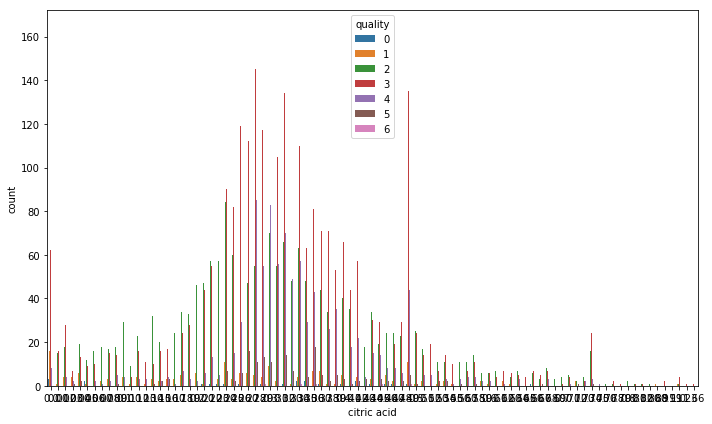

In [66]:
fig = plt.figure(figsize=(10,6))

sns.countplot('citric acid', hue='quality', data=df1)
plt.tight_layout()
plt.show()

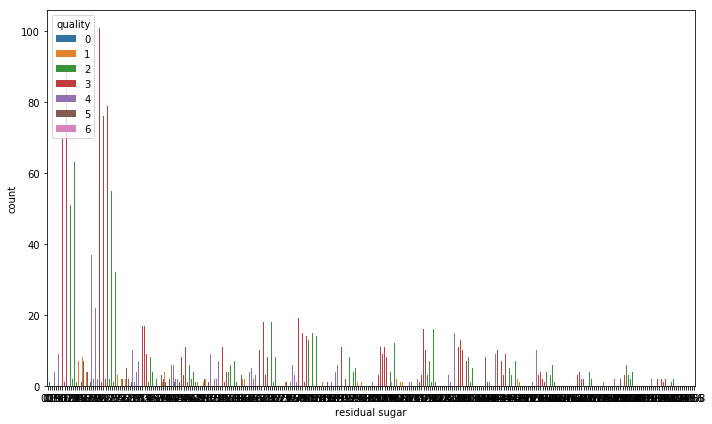

In [67]:
fig = plt.figure(figsize=(10,6))

sns.countplot('residual sugar', hue='quality', data=df1)
plt.tight_layout()
plt.show()

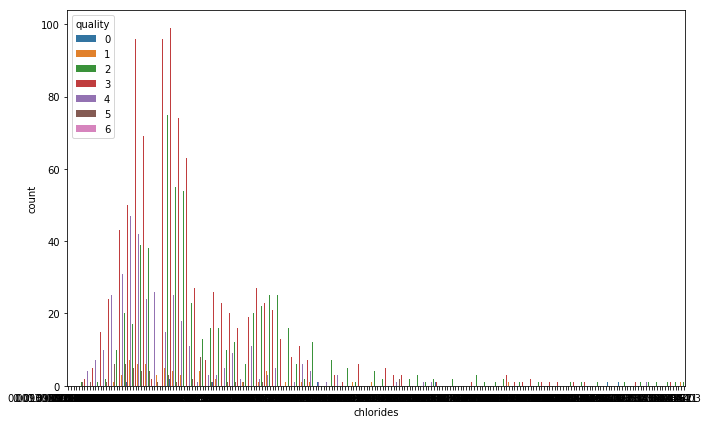

In [68]:
fig = plt.figure(figsize=(10,6))

sns.countplot('chlorides', hue='quality', data=df1)
plt.tight_layout()
plt.show()

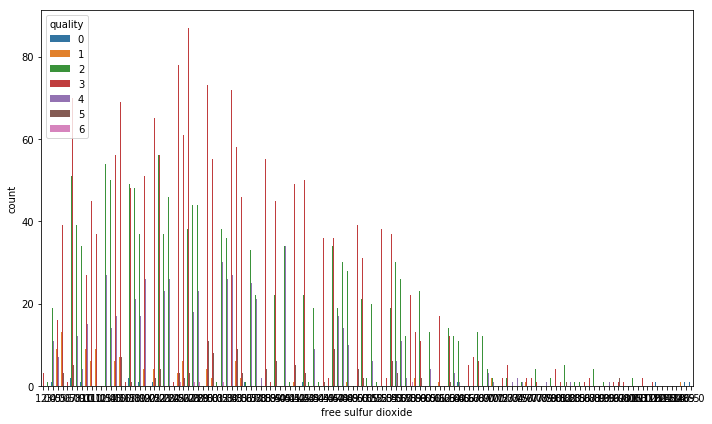

In [69]:
fig = plt.figure(figsize=(10,6))

sns.countplot('free sulfur dioxide', hue='quality', data=df1)
plt.tight_layout()
plt.show()

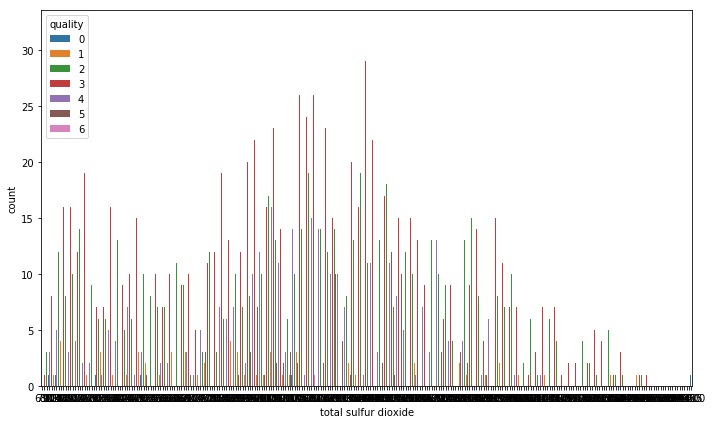

In [70]:
fig = plt.figure(figsize=(10,6))

sns.countplot('total sulfur dioxide', hue='quality', data=df1)
plt.tight_layout()
plt.show()

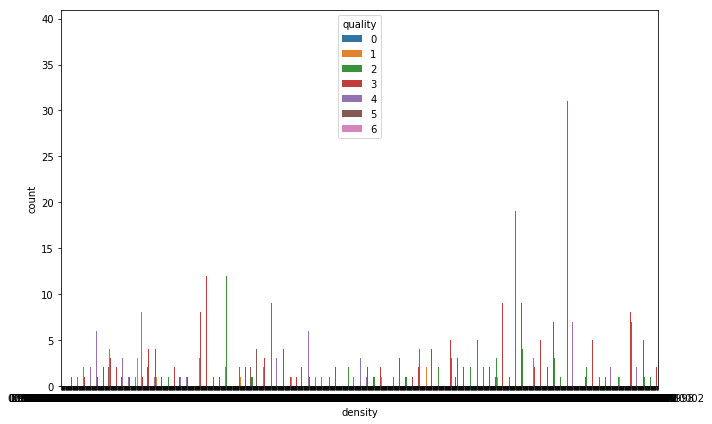

In [71]:
fig = plt.figure(figsize=(10,6))

sns.countplot('density', hue='quality', data=df1)
plt.tight_layout()
plt.show()

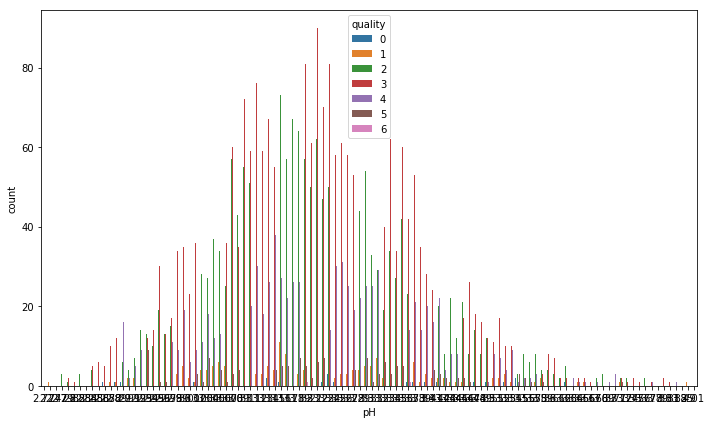

In [72]:
fig = plt.figure(figsize=(10,6))

sns.countplot('pH', hue='quality', data=df1)
plt.tight_layout()
plt.show()

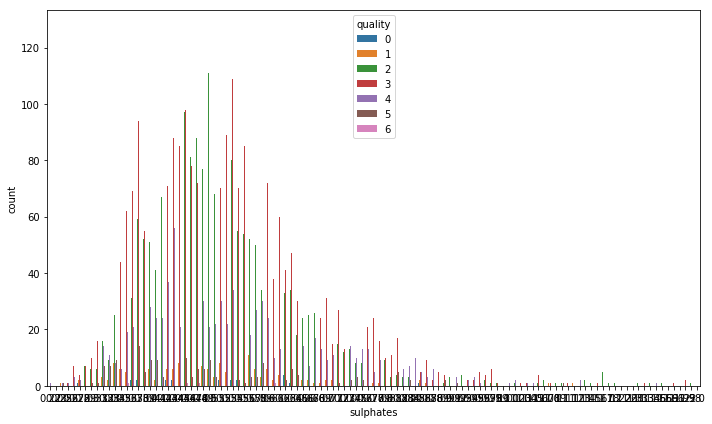

In [73]:
fig = plt.figure(figsize=(10,6))

sns.countplot('sulphates', hue='quality', data=df1)
plt.tight_layout()
plt.show()

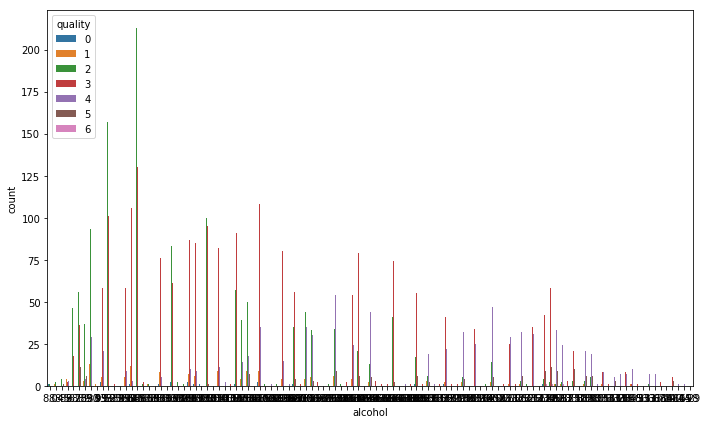

In [74]:
fig = plt.figure(figsize=(10,6))

sns.countplot('alcohol', hue='quality', data=df1)
plt.tight_layout()
plt.show()

### Correlations between features

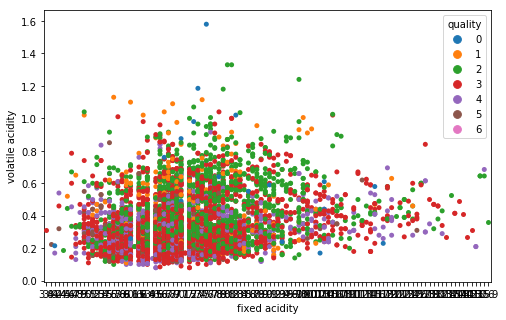

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
sns.stripplot(df1['fixed acidity'],df1['volatile acidity'],hue=df1['quality'],data=df1)

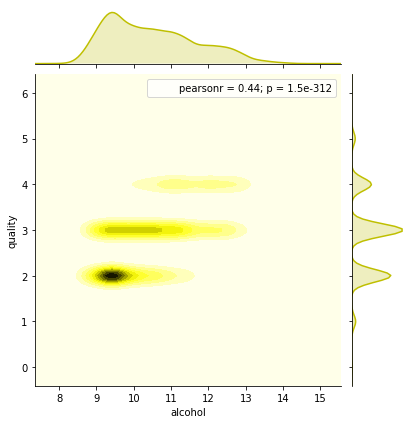

In [54]:
sns.jointplot(df1['alcohol'],df1['quality'],kind='kde',color='y',data=df1)

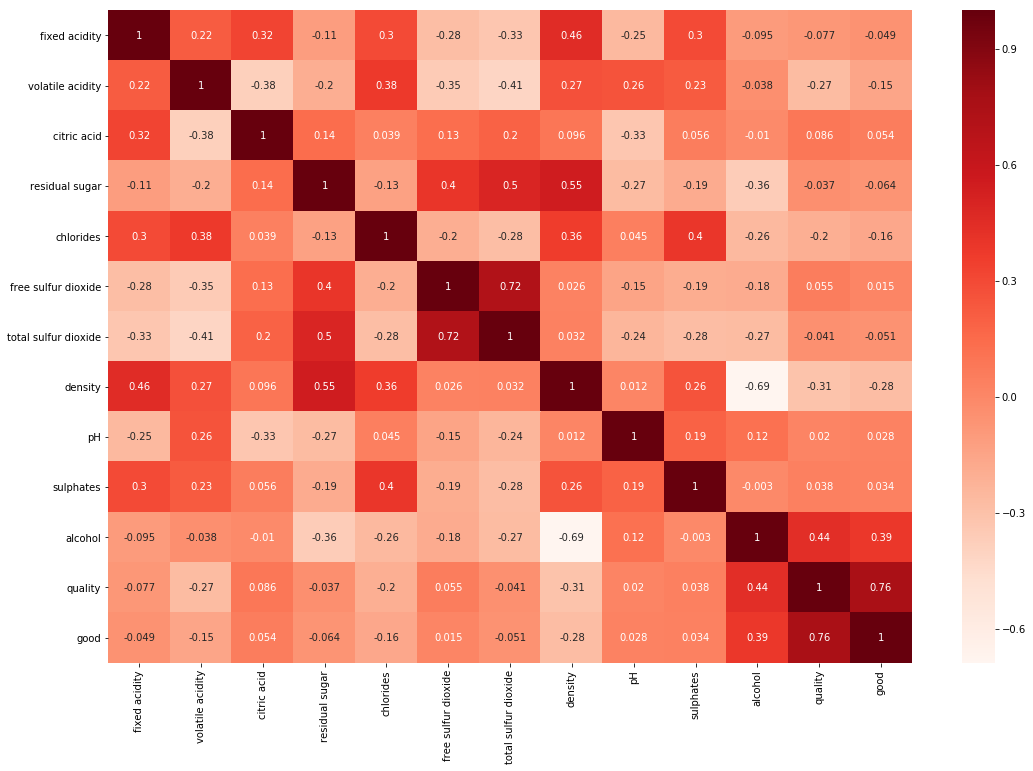

In [55]:
corr = df1.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,cmap='Reds',annot=True)

In [20]:
## drop a variable and axis=1 denotes that we are referring to a column, not a row
ab=df1.drop(["color"],axis=1)
ab

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,2,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,2,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,2,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,3,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,2,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,2,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,2,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,4,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,4,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,2,0


In [21]:
##Convert categorical variable into dummy/indicator variables
ab = pd.get_dummies(ab)
ab

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,2,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,2,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,2,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,3,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,2,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,2,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,2,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,4,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,4,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,2,0


In [22]:
#Now seperate the dataset as response variable and feature variabes
X = ab.drop('quality', axis = 1)
y = ab['quality']

In [23]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [24]:
#Applying Standard scaling to get optimized result
s = StandardScaler()

In [25]:
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm classifier

## Random Forest Classifier

In [26]:
##Random Forest Classifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
pred_model = model.predict(X_test)

In [27]:
##the performance of our model 
print(classification_report(y_test, pred_model))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.50      0.05      0.10        38
          2       0.70      0.71      0.70       397
          3       0.79      0.83      0.81       587
          4       0.85      1.00      0.92       217
          5       1.00      0.29      0.45        51
          6       0.00      0.00      0.00         2

avg / total       0.76      0.77      0.76      1300



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_model))

[[  0   0   5   3   0   0   0]
 [  0   2  21  15   0   0   0]
 [  0   2 283 112   0   0   0]
 [  0   0  98 489   0   0   0]
 [  0   0   0   0 217   0   0]
 [  0   0   0   0  36  15   0]
 [  0   0   0   0   2   0   0]]


In [29]:
model=metrics.accuracy_score(y_test,pred_model)
model

0.7738461538461539

## Gradient Boosting Classifier

In [30]:
model1=GradientBoostingClassifier(n_estimators=200)
model1.fit(X_train,y_train)
pred_model1 = model1.predict(X_test)

In [31]:
print(classification_report(y_test, pred_model1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.06      0.03      0.04        38
          2       0.66      0.61      0.63       397
          3       0.75      0.82      0.78       587
          4       0.83      0.98      0.90       217
          5       0.67      0.20      0.30        51
          6       0.00      0.00      0.00         2

avg / total       0.70      0.73      0.71      1300



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
print(confusion_matrix(y_test, pred_model1))

[[  0   2   4   2   0   0   0]
 [  0   1  21  16   0   0   0]
 [  1  10 242 144   0   0   0]
 [  2   4 102 479   0   0   0]
 [  0   0   0   0 212   5   0]
 [  0   0   0   0  41  10   0]
 [  0   0   0   0   2   0   0]]


In [33]:
model1=metrics.accuracy_score(y_test,pred_model1)
model1

0.7261538461538461

## Bagging Classifier

In [34]:
model2=BaggingClassifier(n_estimators=200)
model2.fit(X_train,y_train)
pred_model2 = model2.predict(X_test)

In [35]:
print(classification_report(y_test, pred_model2))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.43      0.08      0.13        38
          2       0.66      0.70      0.68       397
          3       0.78      0.80      0.79       587
          4       0.85      0.98      0.91       217
          5       0.78      0.27      0.41        51
          6       0.00      0.00      0.00         2

avg / total       0.74      0.75      0.74      1300



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print(confusion_matrix(y_test, pred_model2))

[[  0   0   6   2   0   0   0]
 [  0   3  19  16   0   0   0]
 [  0   4 279 114   0   0   0]
 [  0   0 117 470   0   0   0]
 [  0   0   0   0 213   4   0]
 [  0   0   0   0  37  14   0]
 [  0   0   0   0   2   0   0]]


In [37]:
model2=metrics.accuracy_score(y_test,pred_model2)
model2

0.7530769230769231

## Stochastic Gradient Decent Classifier

In [38]:
from sklearn.linear_model import SGDClassifier
model3 = SGDClassifier(penalty=None)
model3.fit(X_train, y_train)
pred_model3 = model3.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [39]:
print(classification_report(y_test, pred_model3))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.00      0.00      0.00        38
          2       0.52      0.50      0.51       397
          3       0.66      0.73      0.70       587
          4       0.80      1.00      0.89       217
          5       0.00      0.00      0.00        51
          6       0.00      0.00      0.00         2

avg / total       0.59      0.65      0.62      1300



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
print(confusion_matrix(y_test, pred_model3))

[[  0   0   3   5   0   0   0]
 [  1   0  21  16   0   0   0]
 [  0   2 200 195   0   0   0]
 [  0   1 158 428   0   0   0]
 [  0   0   0   0 217   0   0]
 [  0   0   0   0  51   0   0]
 [  0   0   0   0   2   0   0]]


In [41]:
model3=metrics.accuracy_score(y_test,pred_model1)
model3

0.7261538461538461

## Support Vector Classifier

In [42]:
model4 = SVC()
model4.fit(X_train, y_train)
pred_model4 = model4.predict(X_test)

In [43]:
print(classification_report(y_test, pred_model4))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.00      0.00      0.00        38
          2       0.62      0.65      0.64       397
          3       0.75      0.78      0.76       587
          4       0.80      1.00      0.89       217
          5       0.00      0.00      0.00        51
          6       0.00      0.00      0.00         2

avg / total       0.66      0.72      0.69      1300



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
print(confusion_matrix(y_test, pred_model4))

[[  0   0   6   2   0   0   0]
 [  0   0  24  14   0   0   0]
 [  0   0 260 137   0   0   0]
 [  0   0 130 457   0   0   0]
 [  0   0   0   0 217   0   0]
 [  0   0   0   0  51   0   0]
 [  0   0   0   0   2   0   0]]


In [45]:
model4=metrics.accuracy_score(y_test,pred_model4)
model4

0.7184615384615385

## Voting Classifer

In [46]:
list=[]
model5=LogisticRegression()
list.append(('logistics',model5))
model6=SVC()
list.append(('svm',model6))
model7=DecisionTreeClassifier()
list.append(('Decision',model7))
model8 = VotingClassifier(list).fit(X_train,y_train)
pred_model8 = model8.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
print(confusion_matrix(y_test, pred_model8))

[[  0   1   5   2   0   0   0]
 [  0   1  24  13   0   0   0]
 [  0   1 251 145   0   0   0]
 [  0   0 125 462   0   0   0]
 [  0   0   0   0 217   0   0]
 [  0   0   0   0  51   0   0]
 [  0   0   0   0   2   0   0]]


In [48]:
model8=metrics.accuracy_score(y_test,pred_model8)
model8

0.7161538461538461

In [49]:
a=['model','model1','model2','model3','model4','model8']

In [51]:
b=[77.3,72.6,75.3,72.6,71.8,71.6]

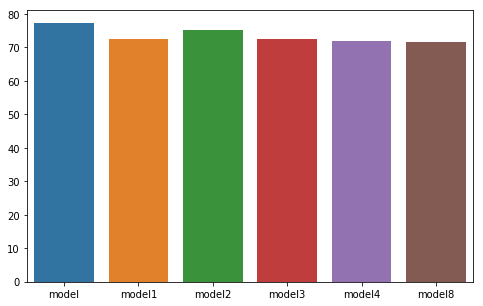

In [52]:
##The bar plot is a graphical representation of the frequency table.
sns.barplot(x=a,y=b)

## Conclusion: so, we get a maximum of 77.3 % accuracy via Random forest classifier model